In [2]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
input_file = "../data/raw/ETTh1.csv"
#output_path = "../../data/synthetic_fishing/"


In [4]:
full_data = pd.read_csv(input_file, index_col=0)


In [5]:
# Check for NaN or null values in the dataset
nan_summary = full_data.isnull().sum()

# Total number of NaN values in the dataset
total_nan = full_data.isnull().sum().sum()

# Display columns with NaN values and their counts
print("NaN Counts Per Column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values

print(f"\nTotal number of NaN values in the dataset: {total_nan}")


NaN Counts Per Column:
Series([], dtype: int64)

Total number of NaN values in the dataset: 0


In [6]:
#full_data = full_data.fillna(0).dropna()
full_data = full_data.dropna()


In [7]:
full_data.describe()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,conso
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,7.375141,2.242242,4.300239,0.881568,3.066062,0.856932,13.324672
std,7.067744,2.042342,6.826978,1.809293,1.164506,0.599552,8.566946
min,-22.705999,-4.756000,-25.087999,-5.934000,-1.188000,-1.371000,-4.080000
25%,5.827000,0.737000,3.296000,-0.284000,2.315000,0.670000,6.964000
50%,8.774000,2.210000,5.970000,0.959000,2.833000,0.975000,11.396000
75%,11.788000,3.684000,8.635000,2.203000,3.625000,1.218000,18.079000
max,23.643999,10.114000,17.341000,7.747000,8.498000,3.046000,46.007000


In [8]:
full_data.columns


Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'conso'], dtype='object')

In [9]:
full_data.info


<bound method DataFrame.info of                        HUFL   HULL   MUFL   MULL   LUFL   LULL      conso
date                                                                     
2016-07-01 00:00:00   5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00   5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00   5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00   5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00   5.358  1.942  1.492  0.462  3.868  1.279  21.948000
...                     ...    ...    ...    ...    ...    ...        ...
2018-06-26 15:00:00  -1.674  3.550 -5.615  2.132  3.472  1.523  10.904000
2018-06-26 16:00:00  -5.492  4.287 -9.132  2.274  3.533  1.675  11.044000
2018-06-26 17:00:00   2.813  3.818 -0.817  2.097  3.716  1.523  10.271000
2018-06-26 18:00:00   9.243  3.818  5.472  2.097  3.655  1.432   9.778000
2018-06-26 19:00:00  10.114  3.550  6.183  1.564  3.716  1.462   9.567000

[1742

In [50]:
full_data.head()


,conso,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0
2006-12-16 19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0
2006-12-16 20:00:00,3.206,0.078,232.430,13.800,0.000,0.000,16.0
2006-12-16 21:00:00,3.314,0.072,236.760,14.000,0.000,0.000,17.0
2006-12-16 22:00:00,3.464,0.170,236.030,14.600,0.000,1.000,17.0


In [10]:
full_data.tail()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,conso
date,,,,,,,
2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904
2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044
2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271
2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778
2018-06-26 19:00:00,10.114,3.550,6.183,1.564,3.716,1.462,9.567


In [9]:
df = full_data.copy()


In [12]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size


In [13]:
print(l, sh, dim, siz)


17420 (17420, 7) 2 121940


In [14]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape


(17420, 7, 1)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

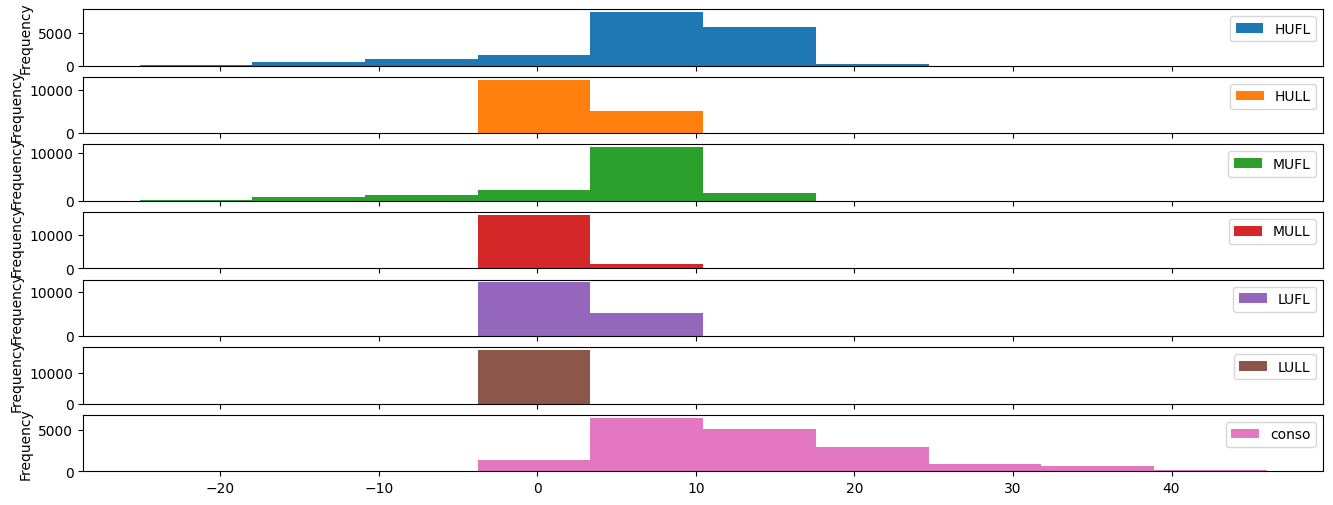

In [15]:
df.plot(kind='hist', subplots=True, figsize=(16, 6))


array([[<Axes: title={'center': 'HUFL'}>,
        <Axes: title={'center': 'HULL'}>,
        <Axes: title={'center': 'MUFL'}>],
       [<Axes: title={'center': 'MULL'}>,
        <Axes: title={'center': 'LUFL'}>,
        <Axes: title={'center': 'LULL'}>],
       [<Axes: title={'center': 'conso'}>, <Axes: >, <Axes: >]],
      dtype=object)

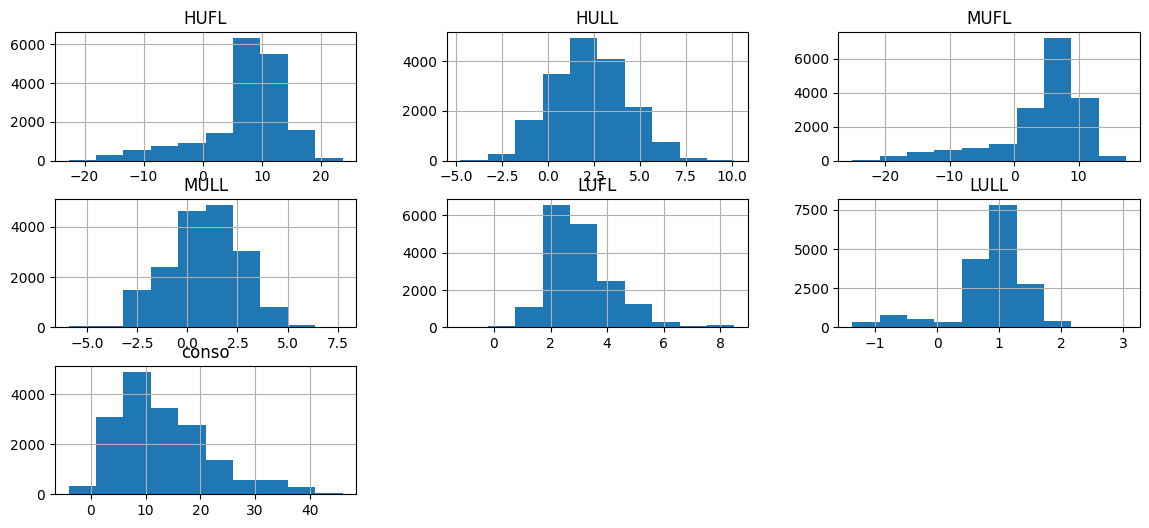

In [16]:
df.hist(figsize=(14, 6))


<Axes: xlabel='conso', ylabel='HUFL'>

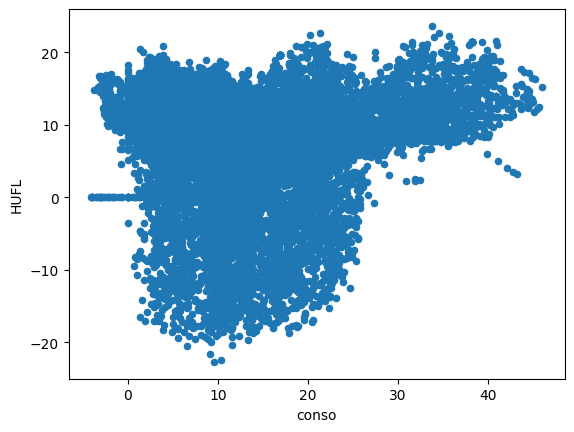

In [17]:
df.plot.scatter(x="conso", y="HUFL")


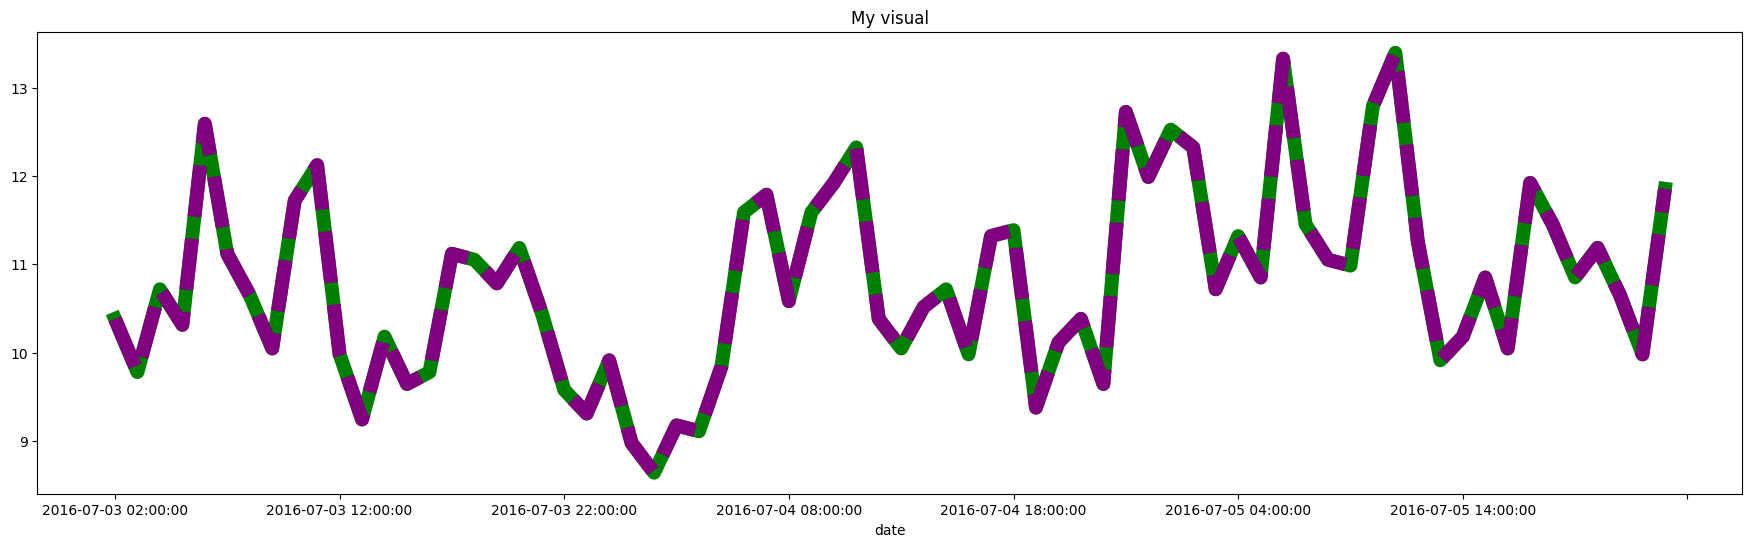

In [44]:
df[50:120]["HUFL"].plot(color="green", linewidth=10, figsize=(22, 6), title="My visual") #linestyle="--"
df[50:120]["HUFL"].plot(color="purple", linewidth=10, linestyle="--", figsize=(22, 6), title="My visual") #linestyle="--"
plt.show()


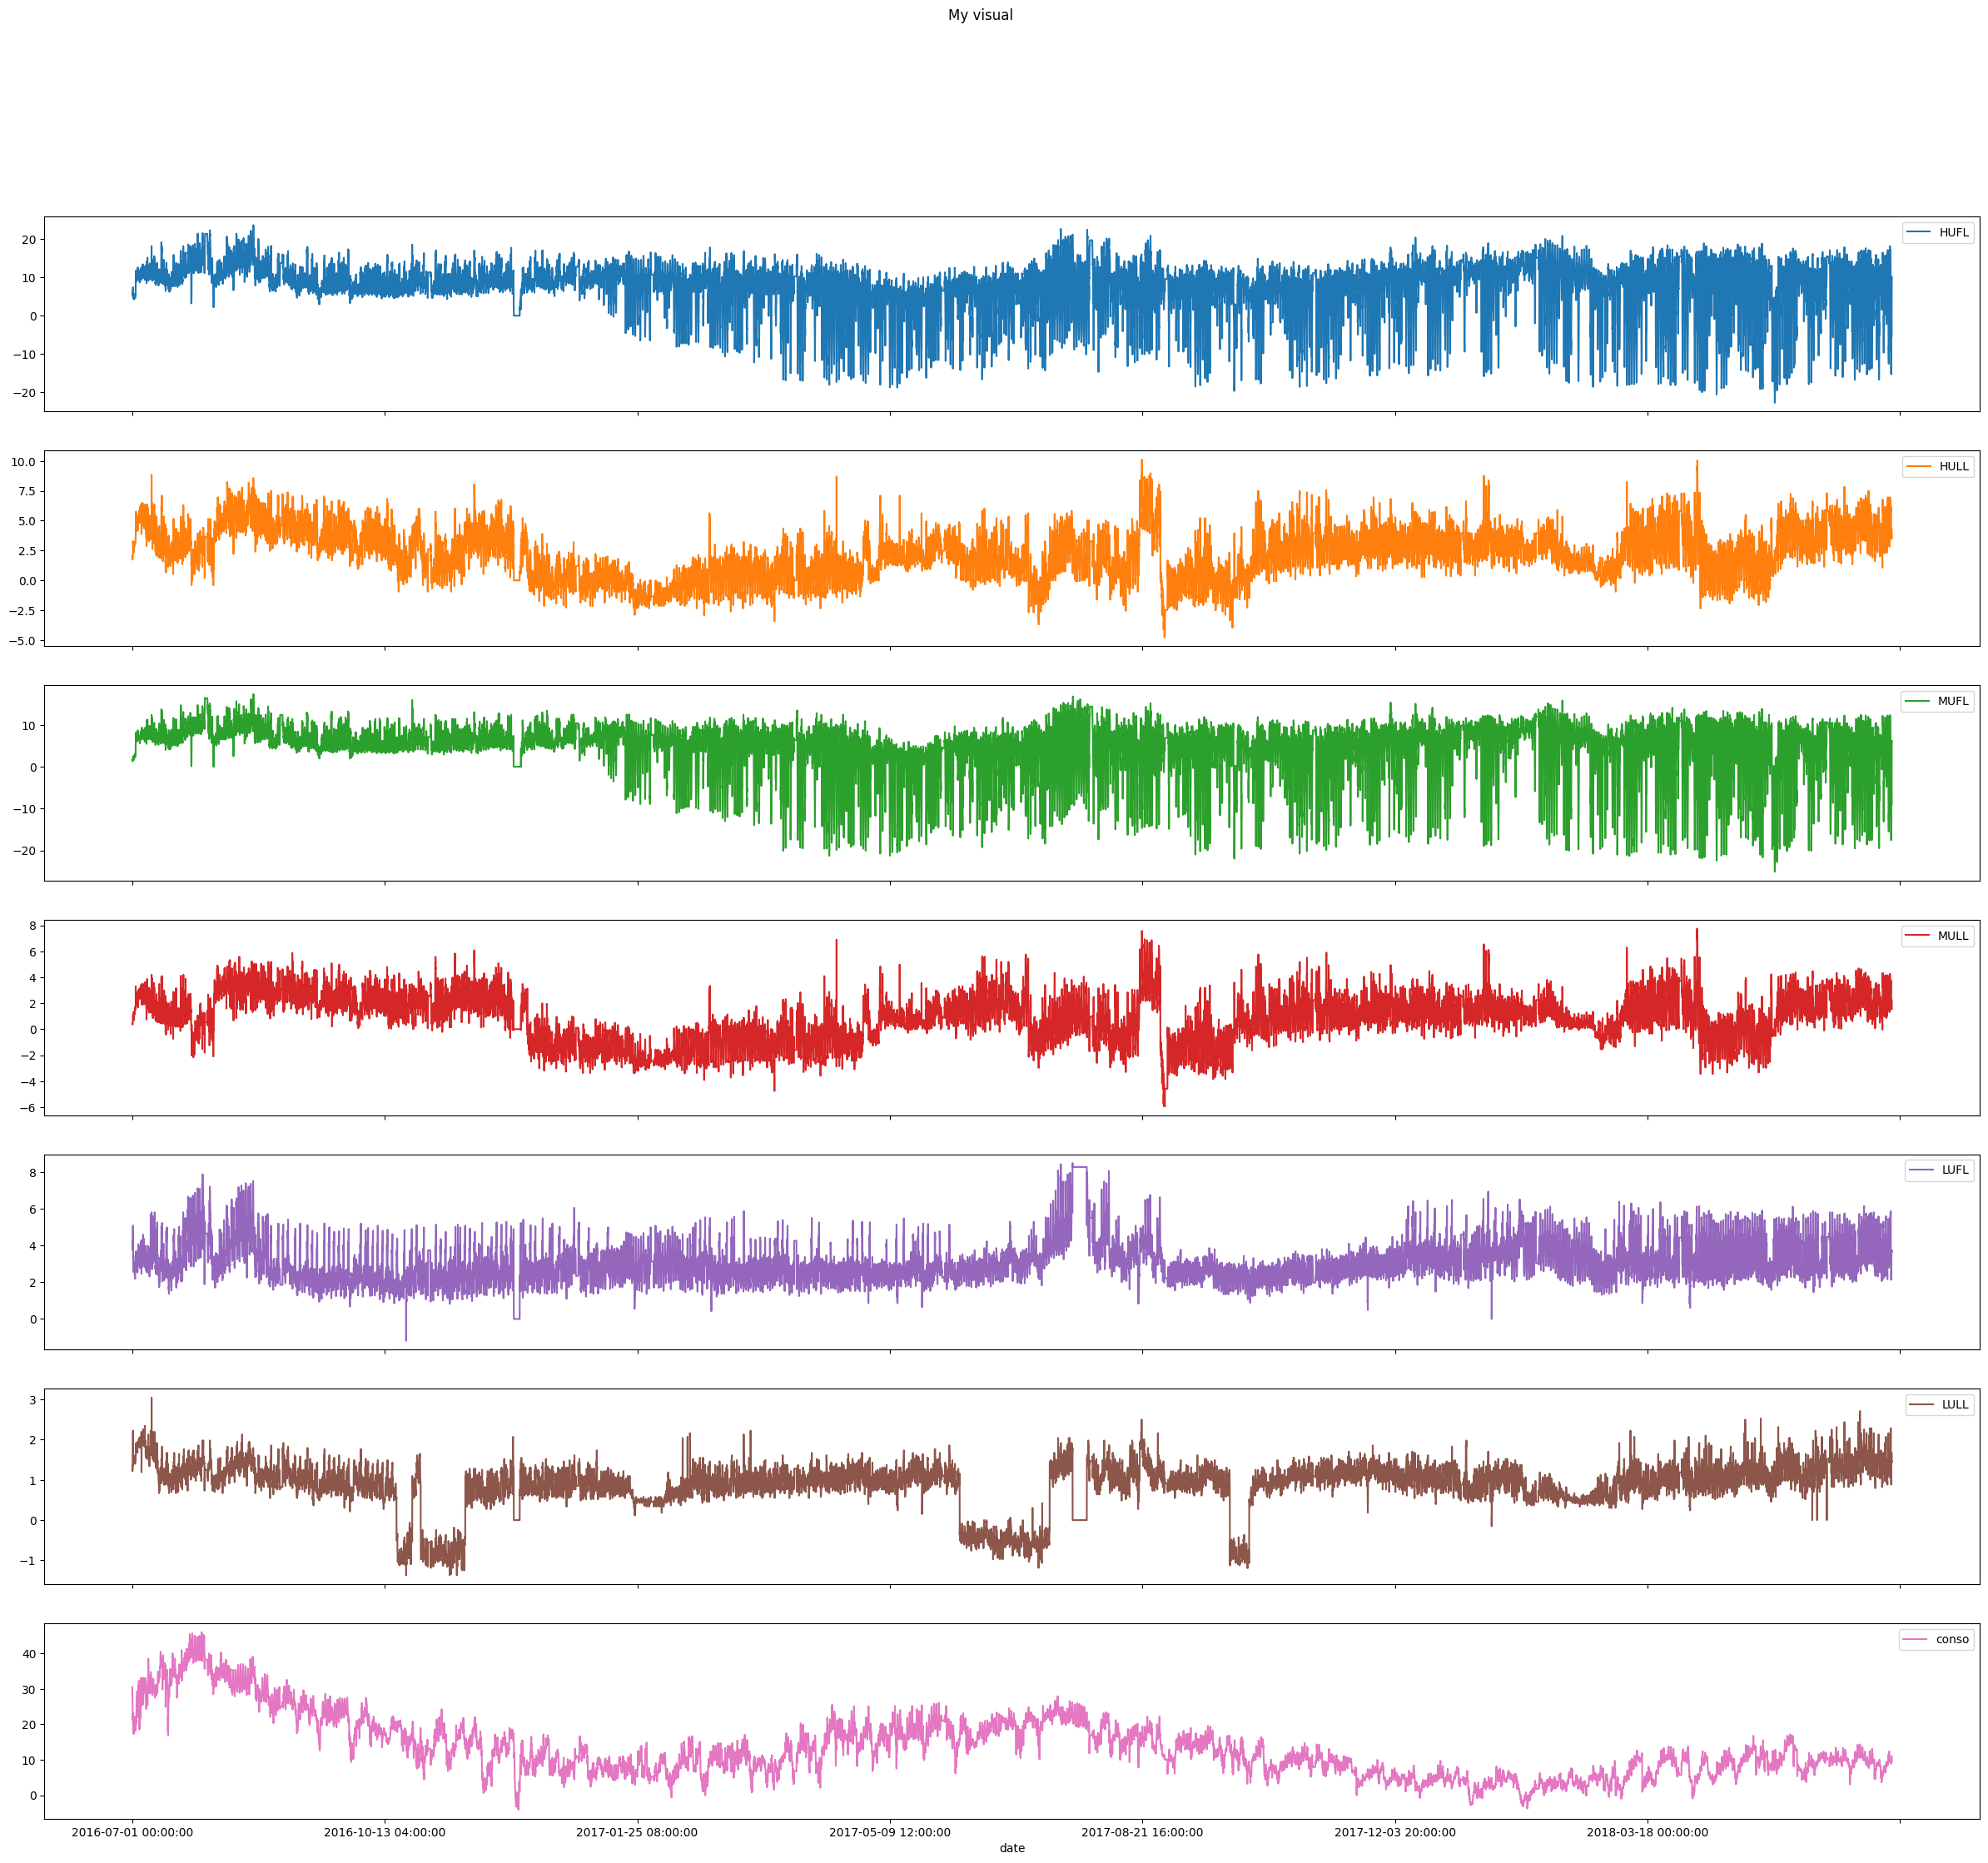

In [18]:
df.plot(subplots=True, figsize=(30, 25), title="My visual")
plt.show()


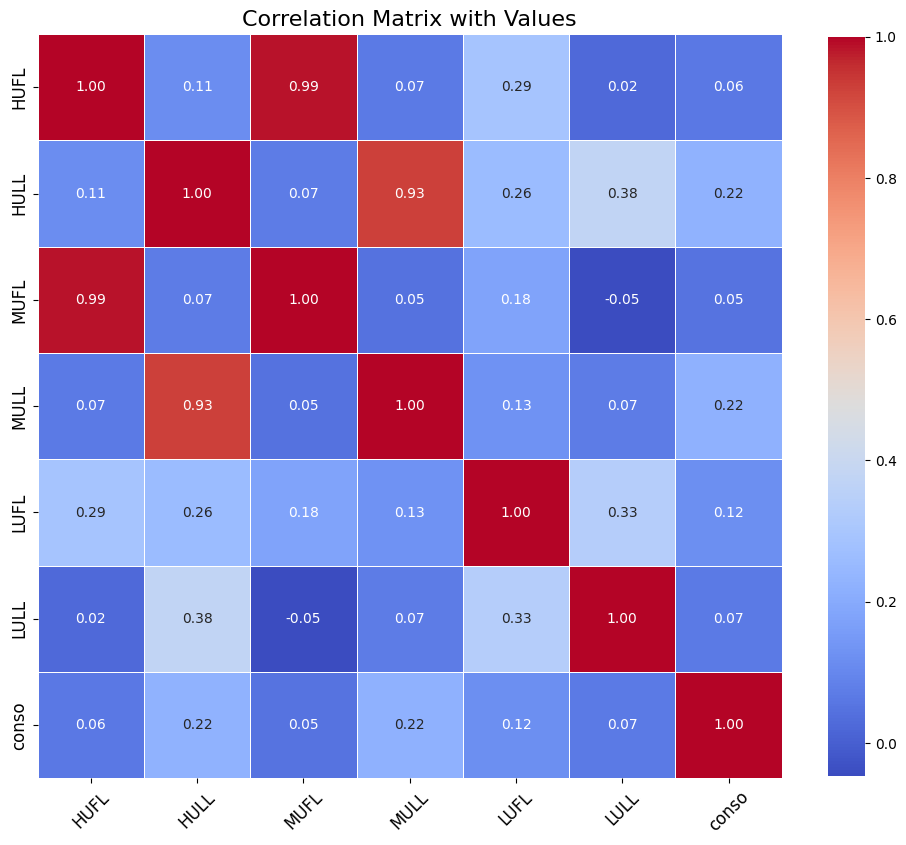

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


In [21]:
df_ = df.copy()
save_path = "../data/raw/etth1_data.csv"
df_.to_csv(save_path, index=True)
print(f"Processed dataset saved to {save_path}")


Processed dataset saved to ../data/raw/etth1_data.csv


In [23]:
new_data = pd.read_csv(save_path, index_col=0)


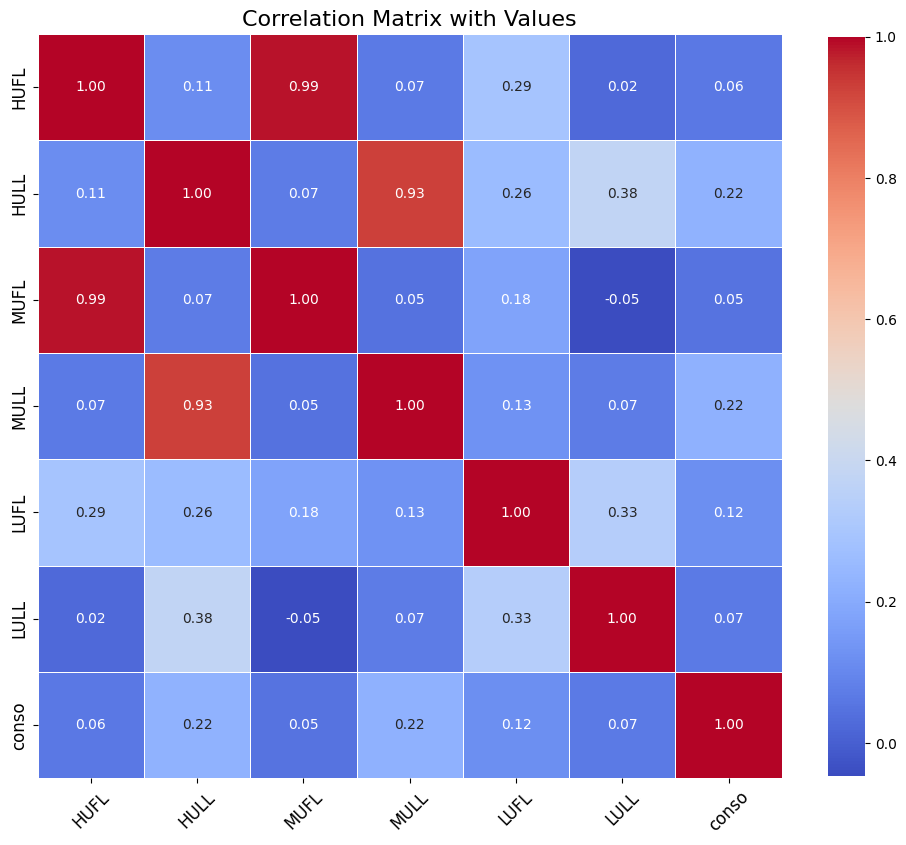

In [24]:
# Calculate the correlation matrix
corr_matrix = new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()
